# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu, ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů na validační množině určete jeho chybu pomocí RMSE a MAE.
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a správně odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **Life expectancy** a jednotlivé body identifikujete pomocí sloupců **Country** a **Year** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami Life expectancy):
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [4]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head(), df.info(), df.describe()
print("Missing values:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2187 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2686 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

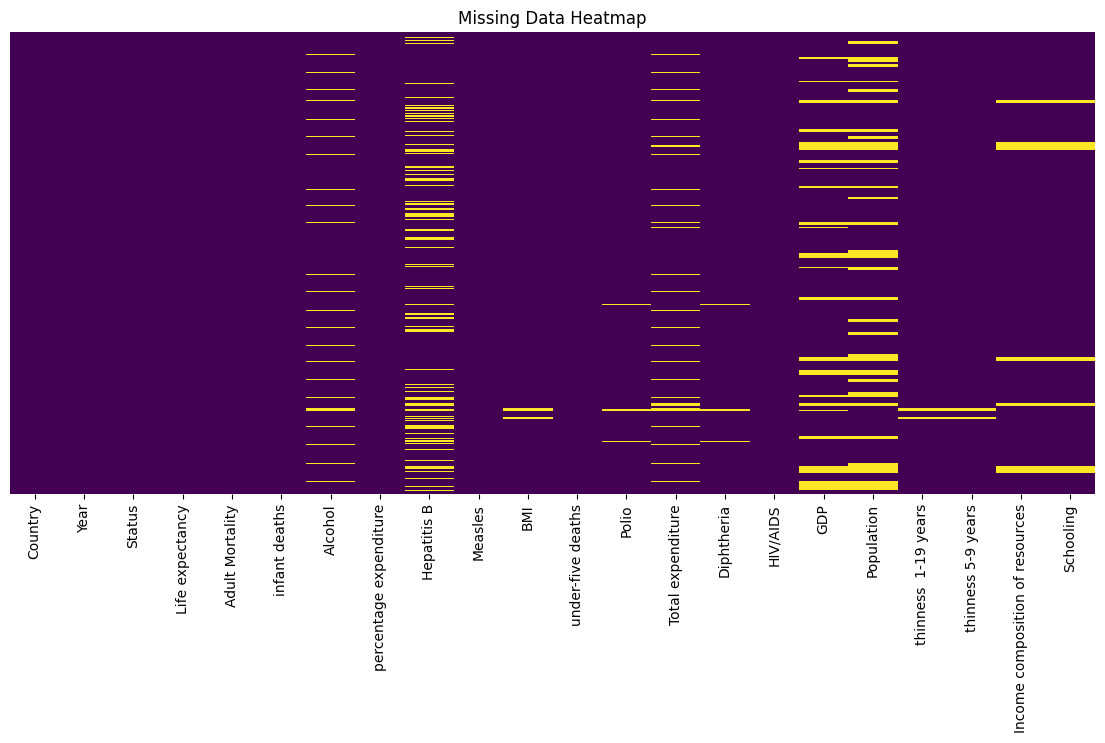

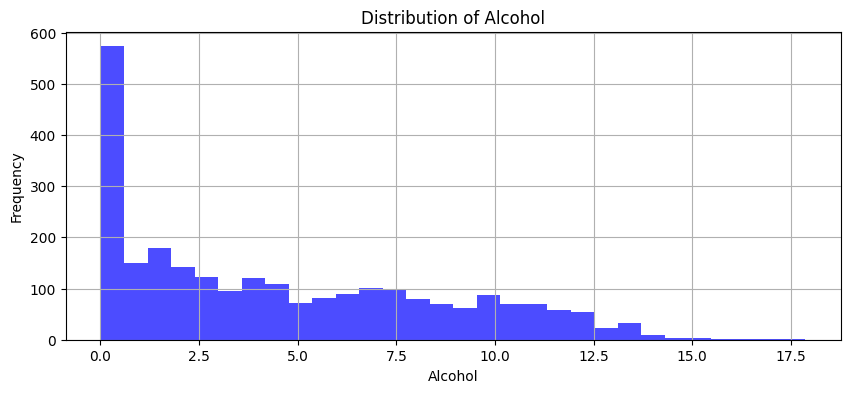

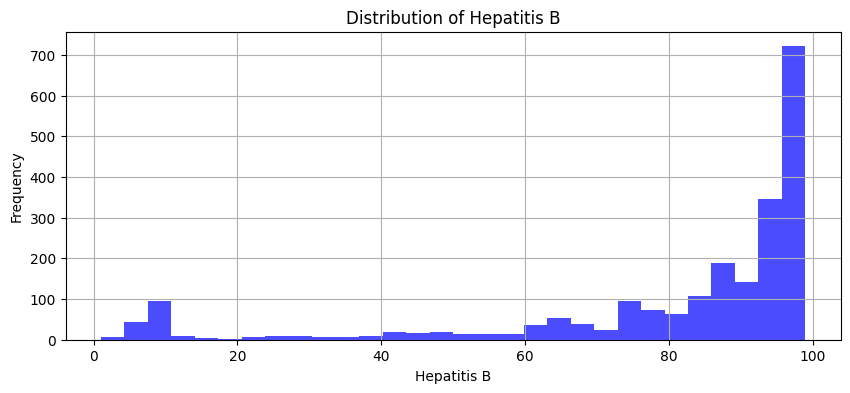

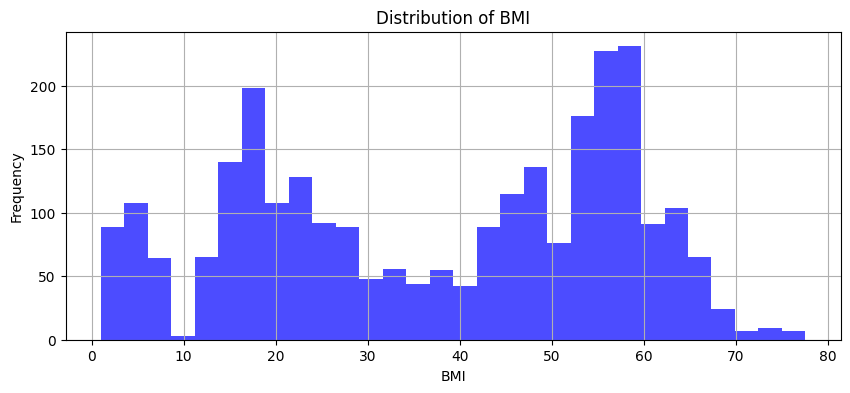

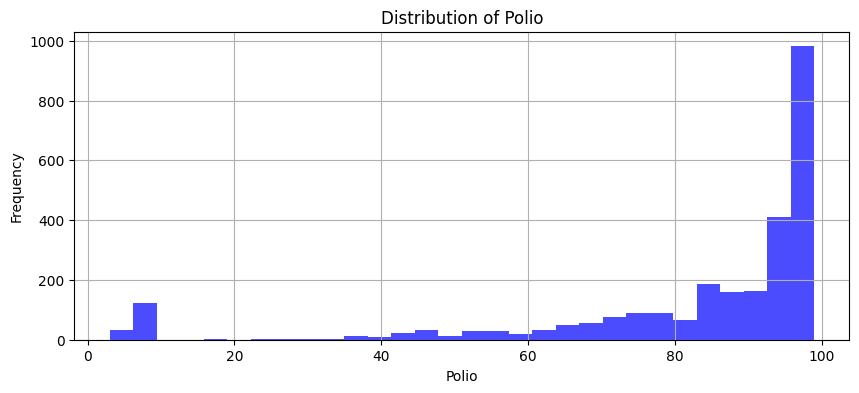

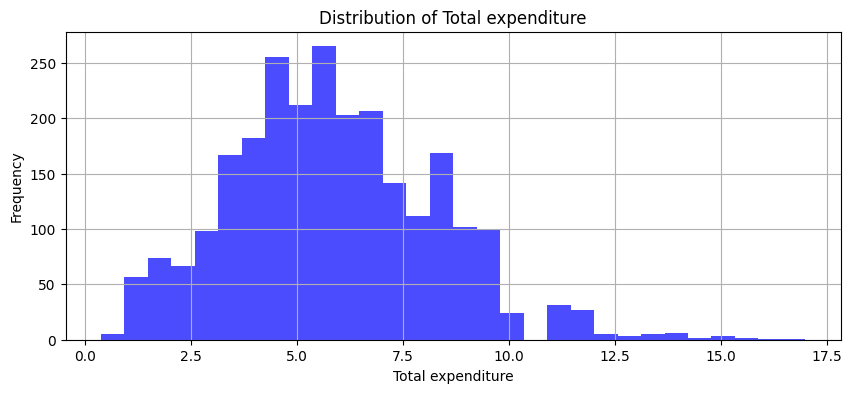

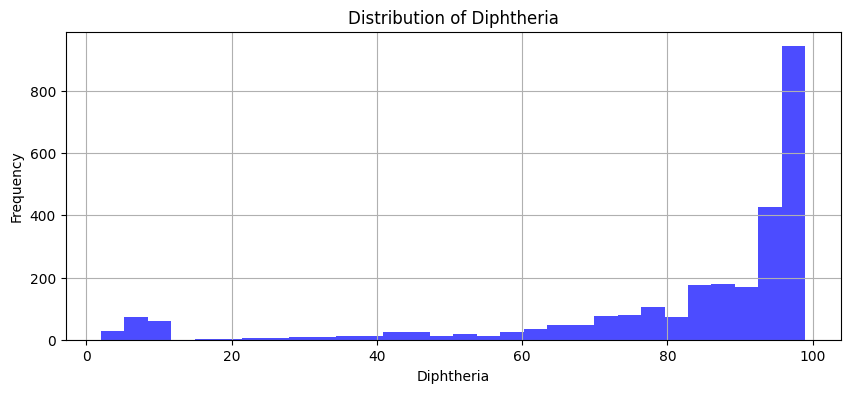

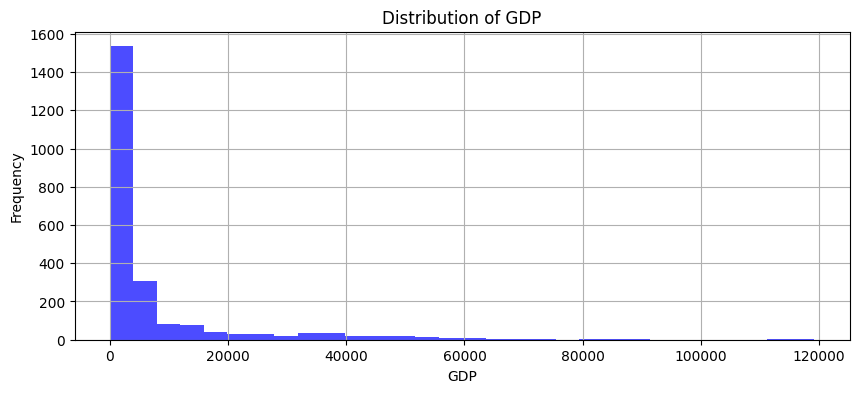

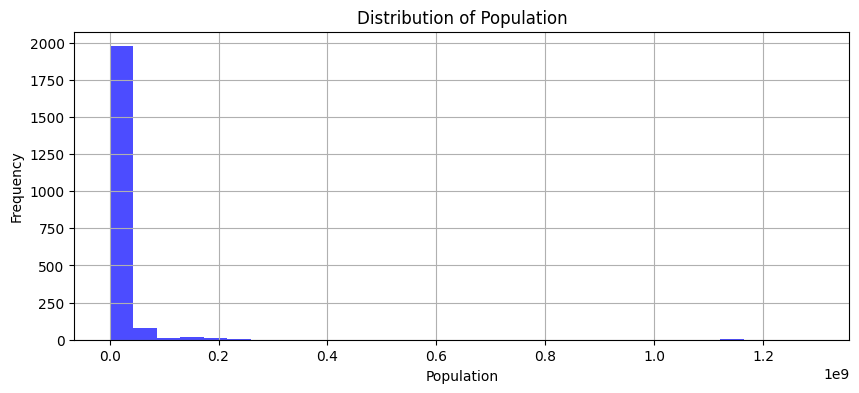

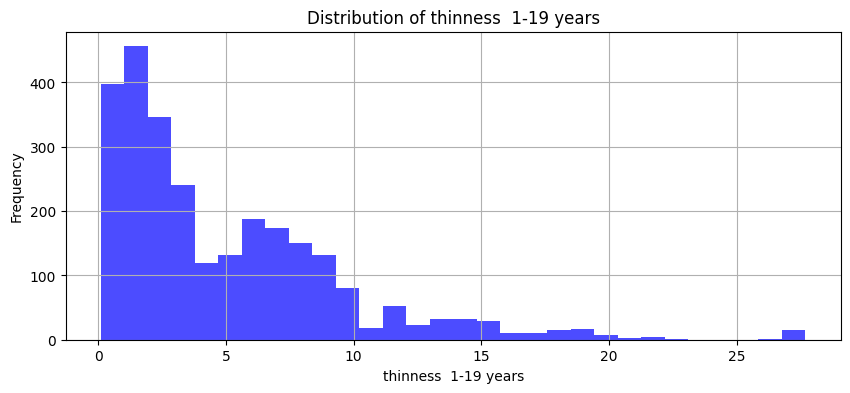

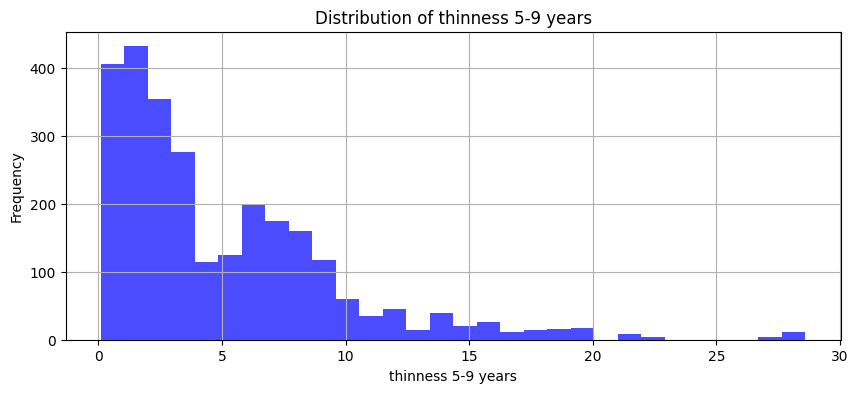

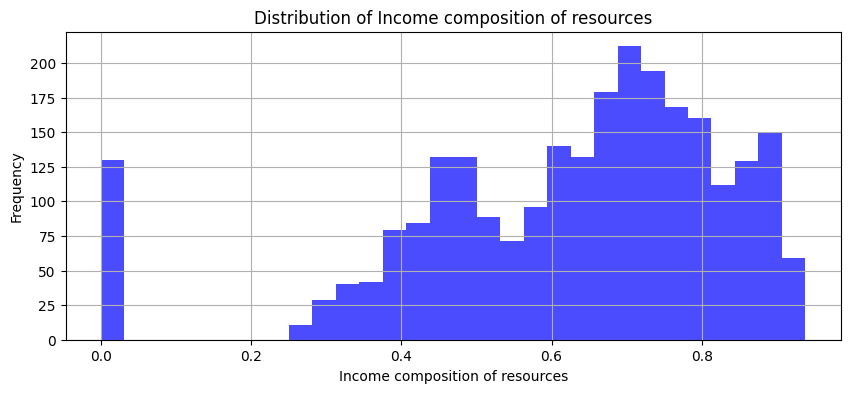

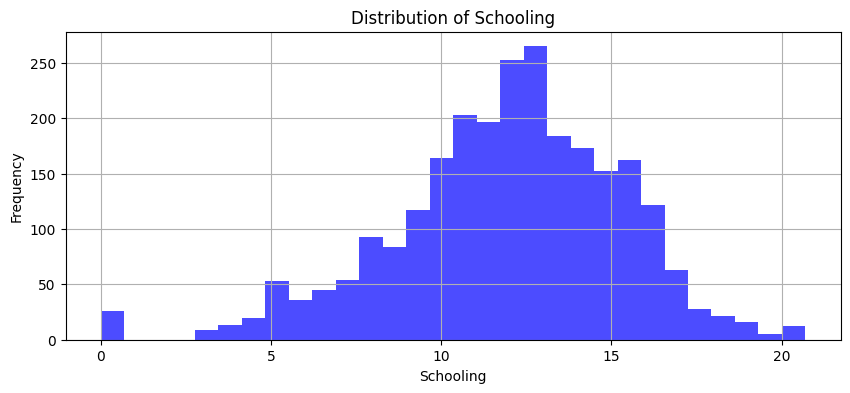

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

#Status to 0 and 1
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})
missing_cols = df.columns[df.isnull().any()]

# Distributions for columns with missing values
for col in missing_cols:
    plt.figure(figsize=(10, 4))
    
    if df[col].dtype in ['float64', 'int64']:
        # Histogram for numerical columns
        df[col].hist(bins=30, color='blue', alpha=0.7)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        # Bar chart for categorical columns
        df[col].value_counts(dropna=False).plot(kind='bar', color='orange', alpha=0.7)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    
    plt.show()

I wanted to visualize the missing values and to look at how are values in columns with missing values distributed.

In [6]:
def PreprocessData(X, reference=None, even_columns=None, uneven_columns=None, group_col='Status'):
    X = X.copy()
    if reference is None:
        reference = X

    # MAp the countries on their numerical values. Later print the names of the countries in the results.
    if 'Country' in X.columns:
        country_categories = X['Country'].astype('category').cat.categories
        country_map = {code: category for code, category in enumerate(country_categories)}
        X['Country'] = X['Country'].astype('category').cat.codes     
    else:
        country_map = {}

    if group_col in X.columns:
        status_dummies = pd.get_dummies(X[group_col], prefix=group_col, drop_first=False)
        X = X.drop(columns=[group_col]).join(status_dummies)

    if even_columns:
        X[even_columns] = X[even_columns].fillna(reference[even_columns].median())

    if uneven_columns:
        X[uneven_columns] = X[uneven_columns].fillna(reference[uneven_columns].mean())
    X = X.fillna(0)

    assert X.isnull().sum().sum() == 0, "There are still missing values."

    return X, country_map

I mapped the countries onto numerical values and used one hot encoding on status. I used used median to fullfil values I thought were mostly evenly distributed and mean on the ones I thought were mostly unevenely distributed. I programmed a PreprocessData function to make data preprocessing easier

In [7]:
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

# Split into training and temporary sets (60% training, 40% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# Split temporary set into validation and test sets (50% each from 40% temporary set)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

even_columns = ['BMI', 'Total expenditure', 'Income composition of resources', 'Schooling', "Population"]
uneven_columns = ['Alcohol', 'Hepatitis B', 'Polio', 'Diphtheria', 'GDP', 
                  'thinness  1-19 years', 'thinness 5-9 years']
X_train, country_map = PreprocessData(X_train, even_columns=even_columns, uneven_columns=uneven_columns)
X_val, _ = PreprocessData(X_val, reference=X_train, even_columns=even_columns, uneven_columns=uneven_columns)
X_test, _ = PreprocessData(X_test, reference=X_train, even_columns=even_columns, uneven_columns=uneven_columns)
X_original = X_train
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)
print("\n training:", X_train)

Training set: (1630, 22)
Validation set: (544, 22)
Test set: (544, 22)

 training:       Country  Year  Adult Mortality  infant deaths    Alcohol  \
207        14  2014            199.0              0  13.940000   
491        31  2006             56.0             17   1.540000   
2640      177  2003            173.0              0   1.200000   
792        52  2007            339.0              3   6.860000   
1670      113  2009            183.0             25   0.220000   
...       ...   ...              ...            ...        ...   
1638      111  2015            199.0             39   4.699226   
1095       74  2008             23.0           1300   1.930000   
1130       76  2005            139.0             27   0.010000   
1294       87  2005              9.0              0   0.010000   
860        57  2013             79.0              0   8.970000   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
207              1147.111400    97.000000    

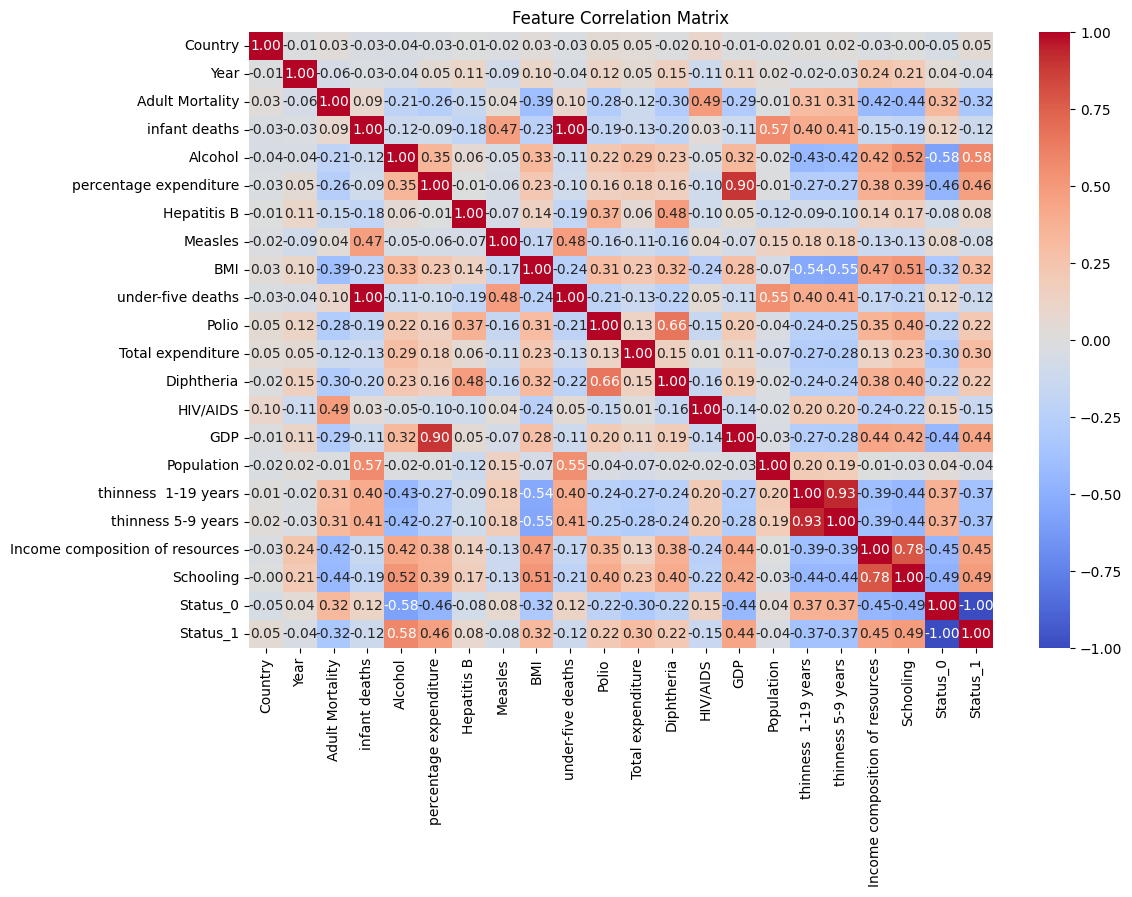

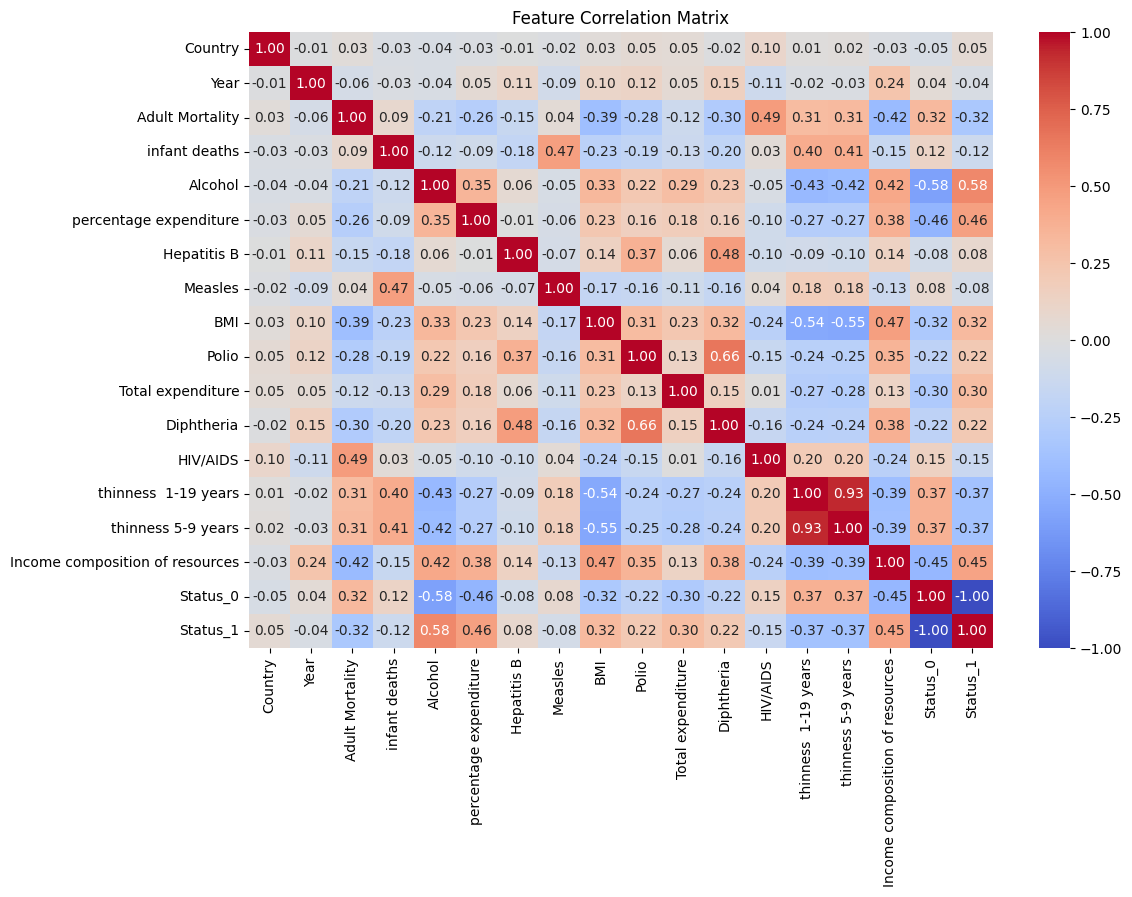

In [8]:
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import numpy as np

redundant_features = ['GDP', 'Schooling', 'Population', 'under-five deaths']
X_train = X_train.drop(columns=redundant_features)
X_val = X_val.drop(columns=redundant_features)
X_test = X_test.drop(columns=redundant_features)

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_val_scaled = minmax_scaler.transform(X_val)
X_test_scaled = minmax_scaler.transform(X_test)

corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

I've printed out heatmap of correlations. I dropped some of the colums with high correlations. I didn't find any significant difference between using Min/Max or Standrad Scaler.

Validation RMSE: 4.65401
Validation MAE: 3.50881
Number of outliers: 26
Outlier Features:
      Country  Year  Adult Mortality  infant deaths    Alcohol  \
63          4  2004            149.0              0   7.280000   
2112      136  2005             48.0             30   3.830000   
44          3  2007            375.0             87   6.350000   
1350       87  2001             11.0              1   2.190000   
1917      123  2010             74.0              2   9.230000   
2584      165  2001             46.0            110   4.090000   
1980      127  2005             37.0             24   7.010000   
177        11  2012            137.0            111   0.010000   
1918      123  2009             75.0              2   8.970000   
2717      174  2000            665.0             24   1.680000   
1494       97  2005             29.0             57   0.550000   
2111      136  2006            464.0             30   3.800000   
2698      173  2003             64.0             39 

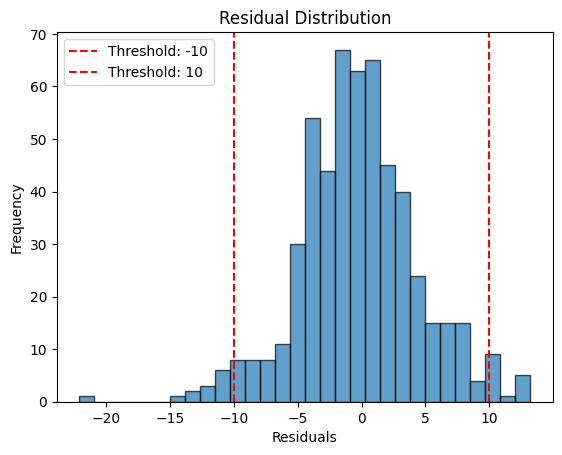

Validation RMSE: 3.90576
Validation MAE: 3.08267


In [9]:
#This is implementation of the Ridge regression model

ridge = Ridge(alpha= 0.000000001)
ridge.fit(X_train_scaled, y_train)
y_val_pred = ridge.predict(X_val_scaled)
ridge_rmse_val = root_mean_squared_error(y_val, y_val_pred)
ridge_mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Validation RMSE: {ridge_rmse_val:.5f}")
print(f"Validation MAE: {ridge_mae_val:.5f}")

residuals = y_val - y_val_pred
threshold = 10
outliers = np.abs(residuals) > threshold
outlier_data = X_val[outliers]
outlier_residuals = residuals[outliers]
print(f"Number of outliers: {len(outlier_data)}")
print("Outlier Features:")
print(outlier_data)
print("Outlier Residuals:")
print(outlier_residuals)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(-threshold, color='r', linestyle='--', label=f"Threshold: {-threshold}")
plt.axvline(threshold, color='r', linestyle='--', label=f"Threshold: {threshold}")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

X_val_filtered = X_val[~outliers]
y_val_filtered = y_val[~outliers]

minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_val_filtered_scaled = minmax_scaler.transform(X_val_filtered)
ridge = Ridge(alpha=0.000000001)
ridge.fit(X_train_scaled, y_train)

y_val_pred_filtered = ridge.predict(X_val_filtered_scaled)
rmse_filtered = root_mean_squared_error(y_val_filtered, y_val_pred_filtered)
mae_filtered = mean_absolute_error(y_val_filtered, y_val_pred_filtered)

print(f"Validation RMSE: {rmse_filtered:.5f}")

print(f"Validation MAE: {mae_filtered:.5f}")

I've used Ridge regression thinking it would deal with possible multicollinearities. Unfortunately even after trying several different alpha hyperparameters RMSE was still much higher than with other models. I tried to eliminate possible outliers but that still left me with worse RMSE unless I severely restricted the data. And at that point I would probably get very biased model. Using basis functions could potentially improve the RMSE due to its better handling of nonlinearity

Validation RMSE: 2.01630
Validation MAE: 1.35025


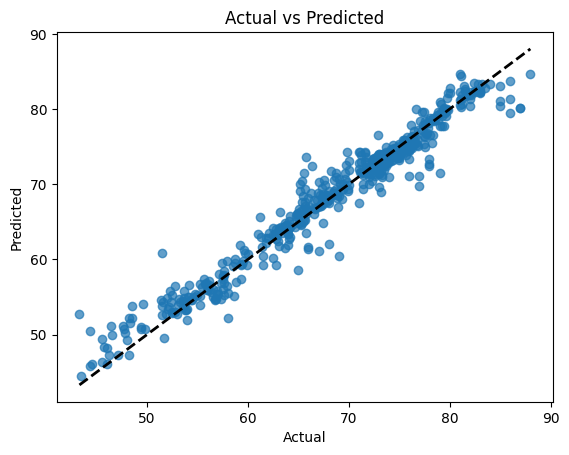

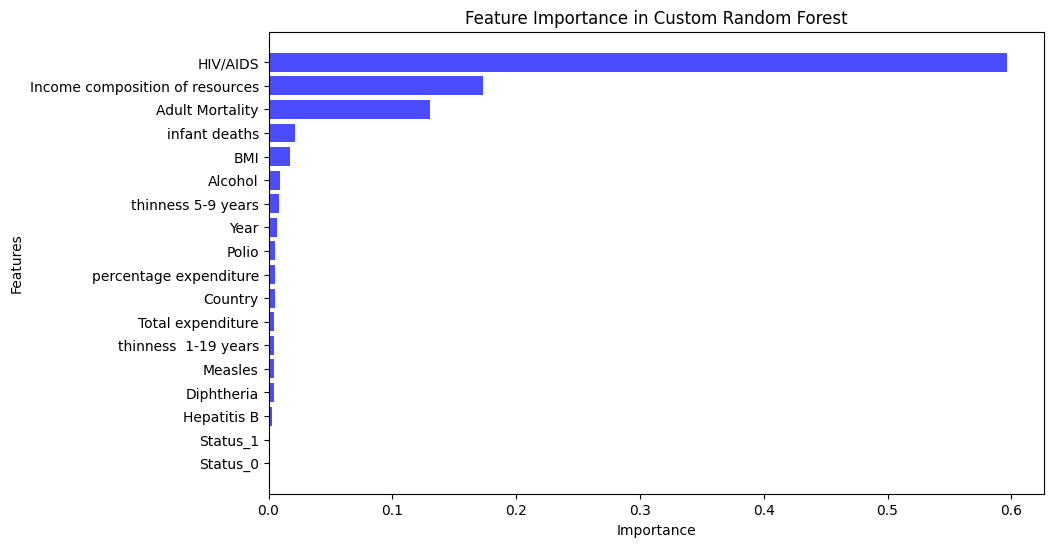


Best RMSE: 1.8597330495861382

Best estimators: 42

Best depth: 37


In [ ]:
# Váš kód zde
from sklearn.tree import DecisionTreeRegressor

########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.trees = []
        self.bootstraps = []
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        X = np.array(X)
        y = np.array(y)
        n_samples = X.shape[0]

        self.trees = []

        for _ in range(self.n_estimators):
            # Bootstrap sampling
            bootstrap_size = int(self.max_samples * n_samples) if isinstance(self.max_samples, float) else self.max_samples
            indices = np.random.choice(n_samples, bootstrap_size, replace=True)
            X_bootstrap, y_bootstrap = X[indices], y[indices]

            # Train a Decision Tree
            tree = DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
            tree.fit(X_bootstrap, y_bootstrap)

            self.trees.append(tree)
            self.bootstraps.append(indices)
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        predictions = np.zeros((self.n_estimators, X.shape[0]))

        for i, tree in enumerate(self.trees):
            predictions[i, :] = tree.predict(X)

        return predictions.mean(axis=0)
custom_rf = CustomRandomForest(n_estimators=50, max_samples=0.8, max_depth=10)
custom_rf.fit(X_train_scaled, y_train)

y_val_pred = custom_rf.predict(X_val_scaled)
rmse = root_mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)

print(f"Validation RMSE: {rmse:.5f}")
print(f"Validation MAE: {mae:.5f}")
# Scatter plot of actual vs. predicted
import matplotlib.pyplot as plt
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

#Feature importances
feature_importances = np.mean([tree.feature_importances_ for tree in custom_rf.trees], axis=0)

# Plot feature importances
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue', alpha=0.7)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Custom Random Forest")
plt.gca().invert_yaxis()
plt.show()

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_train.columns)
# Select important features
important_features = ['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI']
X_train_reduced = X_train_scaled_df[important_features]
X_val_reduced = X_val_scaled_df[important_features]
# Tuning hyperparameters
n = [1, 7, 21, 35, 42, 69, 92, 100, 120]
m = [3, 7, 15, 28, 37, 46, 57, 87, 121]
best_rmse = 200
best_esti = 0
best_depth = 0
for n_estimators in n:
    for max_depth in m:
        custom_rf = CustomRandomForest(n_estimators=n_estimators, max_samples=0.8, max_depth=max_depth)
        custom_rf.fit(X_train_scaled, y_train)
        y_val_pred = custom_rf.predict(X_val_scaled)
        rmse = root_mean_squared_error(y_val, y_val_pred)
        if rmse < best_rmse:
            best_rmse = rmse
            best_esti = n_estimators
            best_depth = max_depth
print("\nBest RMSE:", best_rmse)
print("\nBest estimators:", best_esti)
print("\nBest depth:", best_depth)


I've tried to implement the Random Forest. Random Forest gave me the best result of all models. I've tried to precision it by looking at the feature importance. I've then tried various permutaions of hyperparameters. In the end I've gotten to around 1.85 to 1.9 RMSE on validation data. I think this is becuase Random forest handles outliers much better than Ridge regression.

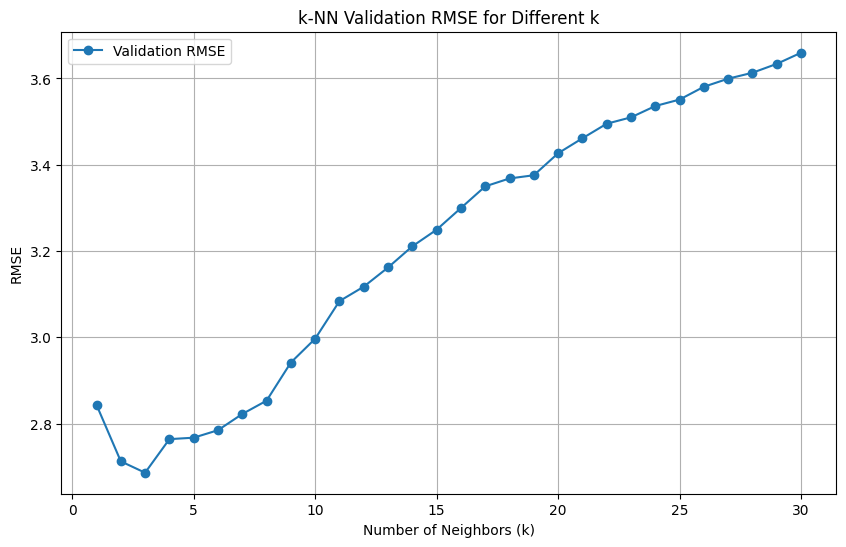

Optimal k: 3, Minimum Validation RMSE: 2.68635


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kvalues = range(1, 31)
knn_rmse = []

for k in kvalues:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_reduced, y_train)
    y_val_pred = knn.predict(X_val_reduced)
    rmse = root_mean_squared_error(y_val, y_val_pred)
    knn_rmse.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(kvalues, knn_rmse, marker='o', label='Validation RMSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('k-NN Validation RMSE for Different k')
plt.legend()
plt.grid()
plt.show()

optimal_k = kvalues[knn_rmse.index(min(knn_rmse))]
print(f"Optimal k: {optimal_k}, Minimum Validation RMSE: {min(knn_rmse):.5f}")

My KNN implementation has solid RMSE but still worse than Random forest. I guess Random forest just handles outliers better. I've tried to reduce the number of columns to only the most important ones but still there is about 0.8 difference between KNN RMSE and Random forest RMSE.

In [ ]:
# Evaluate the Random Forest model on the test set
custom_rf = CustomRandomForest(n_estimators=42, max_samples=0.8, max_depth=57)
custom_rf.fit(X_train_scaled, y_train)
y_test_pred = custom_rf.predict(X_test_scaled)

# Calculate RMSE and MAE on the test set
test_rmse_rf = root_mean_squared_error(y_test, y_test_pred)
test_mae_rf = mean_absolute_error(y_test, y_test_pred)

print(f"Test RMSE (Random Forest): {test_rmse_rf:.5f}")
print(f"Test MAE (Random Forest): {test_mae_rf:.5f}")

Test RMSE (Random Forest): 1.82656
Test MAE (Random Forest): 1.20955


We have about 1.8 RMSE on the testing data.

In [ ]:
# Final evaluation of evaluation.csv
eval_data = pd.read_csv('evaluation.csv')

eval_data['Status'] = eval_data['Status'].map({'Developing': 0, 'Developed': 1})
X_eval, country_map = PreprocessData(eval_data, reference=X_original, even_columns=even_columns, uneven_columns=uneven_columns)
X_eval = X_eval.drop(columns=redundant_features)
X_eval_scaled = minmax_scaler.transform(X_eval)

# final prediction
predictions = custom_rf.predict(X_eval_scaled)
results = pd.DataFrame({
    'Country': X_eval['Country'].map(country_map),
    'Year': eval_data['Year'],
    'Life expectancy': predictions
})
results.to_csv('results_final.csv', index=False)
print("\n", country_map)

print("Final predictions saved to 'results_final.csv'.")


 {0: 'Albania', 1: 'Algeria', 2: 'Bahamas', 3: 'Bolivia (Plurinational State of)', 4: 'Bosnia and Herzegovina', 5: 'Colombia', 6: 'Croatia', 7: 'Denmark', 8: 'Ethiopia', 9: 'Gambia', 10: 'Georgia', 11: 'Ghana', 12: 'Guinea', 13: 'Guinea-Bissau', 14: 'Haiti', 15: 'Hungary', 16: 'Jamaica', 17: 'Jordan', 18: 'Latvia', 19: 'Lebanon', 20: 'Lithuania', 21: 'Mali', 22: 'Malta', 23: 'Namibia', 24: 'Netherlands', 25: 'Norway', 26: 'Poland', 27: 'Portugal', 28: 'Republic of Moldova', 29: 'Samoa', 30: 'Sierra Leone', 31: 'Suriname', 32: 'Syrian Arab Republic', 33: 'United States of America', 34: 'Zambia'}
Final predictions saved to 'results_final.csv'.


Now we just evaluate the evaluation data. We preprocess them in the same manner we preprocessed the previous data and them use the best random forest to make prediction.